In [1]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

Primero defino el mapeo de Hénon:

In [2]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

# Algoritmo para calcular áreas

In [6]:
r, t = Henon(0, 0, 1.4, 0.3)

(1.0,0.0)

In [7]:
function condiones_iniciales_2D(f::Function, t_range)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i])[1]
        CI[2, i] = f(t_range[i])[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D (generic function with 1 method)

In [8]:
σ(t) = cos(t), sin(t)

σ (generic function with 1 method)

In [180]:
G(t) = (1 - 1.4*cos(t)^2 + sin(t), cos(t))

G (generic function with 1 method)

In [182]:
t_rango = 0:0.01:2π
CI1 = condiones_iniciales_2D(σ, t_rango)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853

In [181]:
t_rango = 0:0.01:2π
CI2 = condiones_iniciales_2D(G, t_rango)

2×629 Array{Float64,2}:
 -0.4  -0.38986  -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  1.0   0.99995   0.9998     0.99955       0.999731   0.999913   0.999995


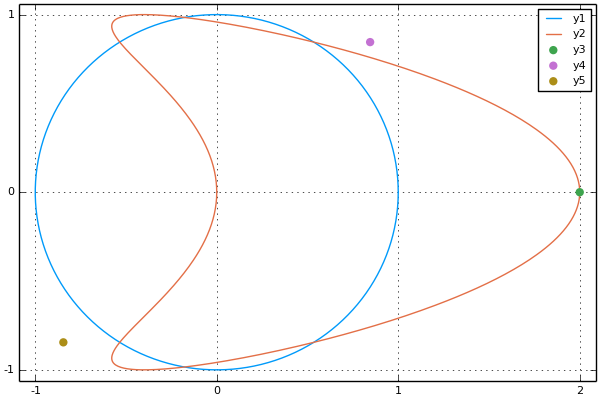

In [183]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])
#scatter!(rand(1)*4 -2, rand(1)*2 -1, leg=false)
scatter!(G(π/2))
scatter!(Henon(x1, x1, 1.4, 1))
scatter!(Henon(x2, x2, 1.4, 1))

In [17]:
function iterator_paso(f::Function, X0, a, b)
    
    orbit = similar(X0)
    
    for i in 1:length(X0[1, :])
        
        orbit[1, i] = f(X0[1, i], X0[2, i], a, b)[1]
        orbit[2, i] = f(X0[1, i], X0[2, i], a, b)[2]
    
    end
    
    orbit
    
end 

iterator_paso (generic function with 1 method)

In [18]:
function ξ(t) #parametrización cuadrado.
    t <= 2 && return (t-1, 1)
    t > 2 && t <= 4 && return (1, 3 - t)
    t > 4 && t <= 6 && return (5 - t , -1)
    t > 6 && return (-1, 7 - t)
end

ξ (generic function with 1 method)


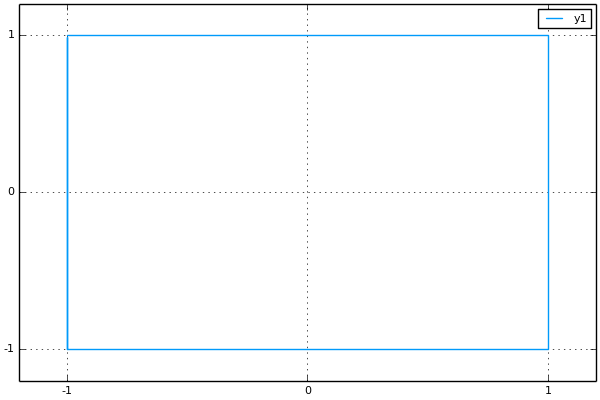

In [184]:
t2_rango = 0:0.01:8
CC1 = condiones_iniciales_2D(ξ, t2_rango)
plot(CC1[1, :], CC1[2, :], xlims=(-1.2, 1.2), ylims=(-1.2, 1.2))

In [186]:
CC2 = iterator_paso(Henon, CC1, 1.4, 1)
CC3 = iterator_paso(Henon, CC2, 1.4, 1)

2×801 Array{Float64,2}:
 -0.504  -0.541891  -0.581442  -0.622587  …  -2.66616  -2.70494  -2.744
  0.6     0.62786    0.65544    0.68274      -1.38     -1.39     -1.4  


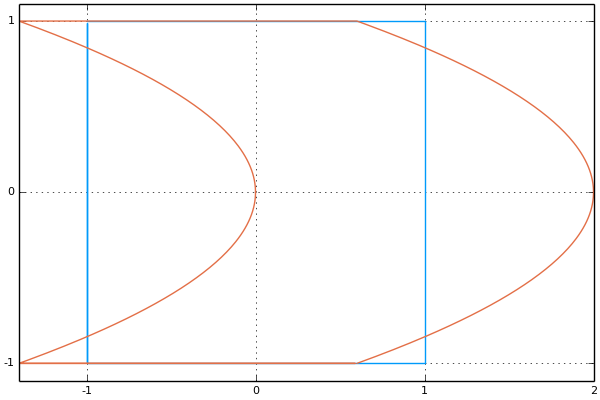

In [188]:
plot(CC1[1, :], CC1[2, :], leg = false)
plot!(CC2[1, :], CC2[2, :], ylims=(-1.1, 1.1))

## Primer método (Henon inverso)

In [189]:
function Henon_inv(x, y, a, b)
    
    y/b , x + a*(y/b)^2 -1
    
end 

Henon_inv (generic function with 1 method)

In [190]:
CInv1 = iterator_paso(Henon_inv, CI2, 1.4, 1)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853


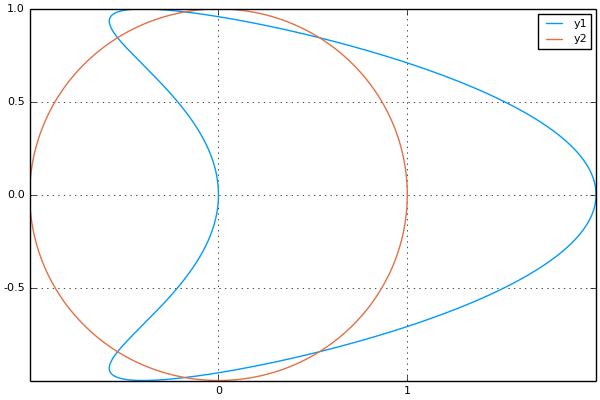

In [191]:
plot(CI2[1, :], CI2[2, :])
plot!(CInv1[1, :], CInv1[2, :])

In [25]:
function random_interval(n, range)
    
    i = range[1]
    f = range[end]
    
    rand(n)*abs(f - i) + i
    
end 

random_interval (generic function with 1 method)

In [45]:
function area_henon(N, a, b, range)
    
    dentro = 0
    total = 0
    
    for i in 1:N
        
        x, y = random_interval(2, range)
        x_n, y_n = Henon_inv(x, y, a, b)
        
        r = sqrt(x_n^2 + y_n^2)
        
        if r < 1 
            dentro += 1
        end
        
        total += 1
    end

    area = (range[end] - range[1])^2
    area * dentro/total
end

area_henon (generic function with 1 method)

In [65]:
area_henon(1000000, 1.4, 1.0, -1:2)

3.141774

In [50]:
area_henon(1000000, 1.4, -1, -1:2)

3.147084

## Método Inside or Outside


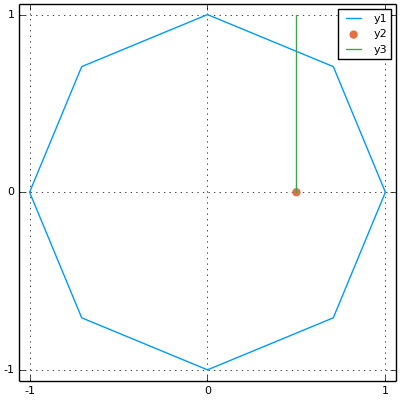

In [97]:
t_range = 0:2π/8:2π
plot(σ(t_range), size=(400, 400))
scatter!((0.5, 0.0))
plot!([(0.5, i) for i in 0:1])

In [118]:
(1 == 2 && 3 == 3) || 2==2

true

In [121]:
function in_or_out(σ, range, x, y)
    
    crossings = 0
    
    for i in 1:length(range)-1
        
        if x < σ(range[i])[1] && x < σ(range[i+1])[1] || x > σ(range[i])[1] && x > σ(range[i+1])[1]
            
            nothing
            
        elseif y > σ(range[i])[2] && y > σ(range[i+1])[2]
            
            nothing
    
        elseif y < σ(range[i])[2] && y < σ(range[i+1])[2] 
            
            if x < σ(range[i])[1] && x > σ(range[i+1])[1] || x > σ(range[i])[1] && x < σ(range[i+1])[1]
                
                crossings += 1
                
            end
            
        elseif y > σ(range[i])[2] && y < σ(range[i+1])[2] 
            
            if x > σ(range[i])[1] && x < σ(range[i+1])[1]
                
                y_c = σ(range[i])[2] + (σ(range[i + 1])[2] - σ(range[i])[2])*(x - σ(range[i])[1])/(σ(range[i+1])[1] - σ(range[i])[1])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < σ(range[i])[2] && y > σ(range[i+1])[2] 

            if x <σ(range[i])[1] && x > σ(range[i+1])[1]

                y_c = σ(range[i+1])[2] + (σ(range[i])[2] - σ(range[i + 1])[2])*(x - σ(range[i+1])[1])/(σ(range[i])[1] - σ(range[i+1])[1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out (generic function with 1 method)

In [125]:
t_rango

0.0:0.01:6.28

In [143]:
in_or_out(σ, t_rango, -0.9999, 0)

true

In [162]:
function find_area(σ::Function, t_range, x_range, y_range, N)
    
    inside = 0
    total = 0
    area = (x_range[end] - x_range[1]) * (y_range[end] - y_range[1])
    
    for i in 1:N
        
        x = random_interval(1, x_range)[1]
        y = random_interval(1, y_range)[1]
        
        if in_or_out(σ, t_range, x, y)
            
            inside += 1
            
        end
        
        total += 1
    end

    area * inside / total
    
end

find_area (generic function with 1 method)

In [165]:
@time find_area(σ, t_rango, -1:1, -1:1, 1000000)

 40.780678 seconds (11.00 M allocations: 656.136 MB, 0.34% gc time)


3.1407


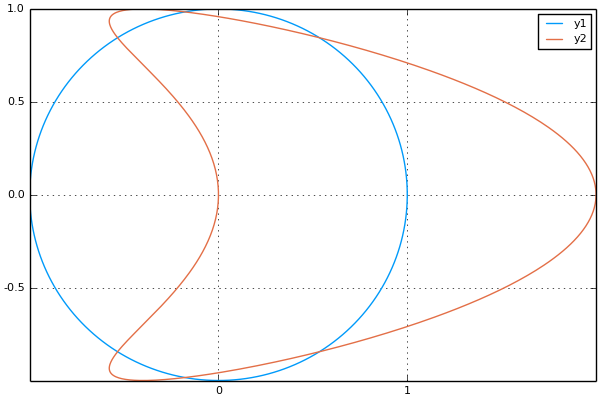

In [192]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])

In [193]:
in_or_out(G, t_rango, -1, 0.5)

true

In [194]:
t_rango

0.0:0.01:6.28

In [197]:
find_area(G, t_rango, -1:2, -1:1, 100000)

3.13476

## Hénon con $a = 1.4 \ b = 1$  

In [199]:
CI2 = iterator_paso(Henon, CI1, 1.4, 1)
CI3 = iterator_paso(Henon, CI2, 1.4, 1)
CI4 = iterator_paso(Henon, CI3, 1.4, 1)

2×629 Array{Float64,2}:
 -3.81585  -3.86139  -3.90654  -3.95117  …  -3.70946  -3.75542  -3.80128
  1.776     1.78716   1.79823   1.80919      1.7499    1.76118   1.77243


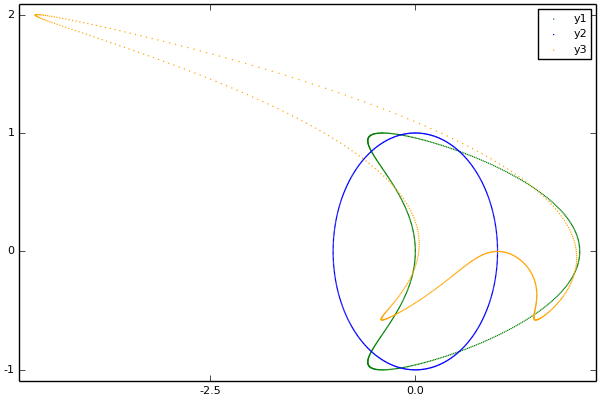

In [200]:
scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:green)
scatter!(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange, grid=false)
#scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)

## Hénon con $a = 1.4 \ b = 0.3$  

In [201]:
CI2 = iterator_paso(Henon, CI1, 1.4, 0.3)
CI3 = iterator_paso(Henon, CI2, 1.4, 0.3)
CI4 = iterator_paso(Henon, CI3, 1.4, 0.3)

2×629 Array{Float64,2}:
 -0.740886  -0.771756  -0.802828  …  -0.670501  -0.70062   -0.731108
  0.3228     0.326159   0.329512      0.315028   0.318373   0.32173 


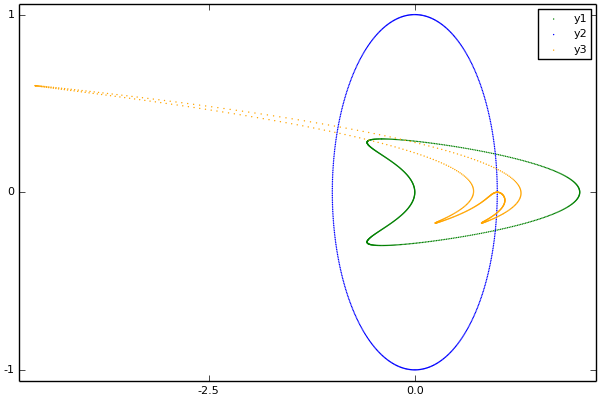

In [202]:
scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:green)
scatter!(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange, grid=false)
#scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)

## Referencias 
 1. Finding Areas Using the Monte Carlo Method. http://commons.bcit.ca/math/entertainment/inout/index.html
 2. The Inside or Outside Problem. http://commons.bcit.ca/math/entertainment/inout/index.html 